# API with Phyton

In [1]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '49da492c-d92c-4045-9301-c108ac425320', # Ganti key sesuai akunmu
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-11-14T01:41:07.673Z', 'error_code': 0, 'error_message': None, 'elapsed': 62, 'credit_count': 1, 'notice': None, 'total_count': 8814}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10552, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None) # Display full kolom
pd.set_option('display.max_rows', None) # Display full rows

In [4]:
df = pd.json_normalize(data['data']) # Cari di In 2, analisa data, mana yang bisa ditampilan

In [ ]:
df['timestamp'] = pd.to_datetime('now')
df

In [10]:
# Make function for API
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '49da492c-d92c-4045-9301-c108ac425320', # Ganti key sesuai akunmu
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Append dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])
    
    # Make to CSV file
    if not os.path.isfile(r'H:\Phyton Tutorial\Website API Using Phyton\API.csv'): #Used for check the path, is there any file that has the same name
        df.to_csv(r'H:\Phyton Tutorial\Website API Using Phyton\API.csv', header = 'column_names')
    else: # IF there already the file name, it's will append the data
        df.to_csv(r'H:\Phyton Tutorial\Website API Using Phyton\API.csv', mode = 'a', header = False)

In [11]:
# The for Automatically run  
import os
from time import time
from time import sleep

for i in range(333): # 333 is maximum get API in crypto website per day
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) # sleep for 1 minute, wait for 60 seconds an drun again
exit()

API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [ ]:
### If want to run the code below (to check csv file), it must stop the programme above firts ###

In [12]:
# To check the update of csv file without open it 
df3 = pd.read_csv(r'H:\Phyton Tutorial\Website API Using Phyton\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.954161e+07,1.954161e+07,False,NaN,1,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,36358.702071,1.919906e+10,62.0531,0.367483,-2.314516,4.017033,35.186446,37.160608,24.466905,7.105074e+11,51.0942,7.635327e+11,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
1,1,1027,Ethereum,ETH,ethereum,7776,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202603e+08,1.202603e+08,True,NaN,2,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,2043.748498,1.437197e+10,82.7315,0.512717,-0.959393,7.916610,31.356791,25.545329,11.766426,2.457818e+11,17.6795,2.457818e+11,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
2,2,825,Tether USDt,USDT,tether,65639,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.680446e+10,9.062366e+10,True,NaN,3,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,1.000337,4.812605e+10,43.3834,-0.003786,-0.040900,-0.005051,0.026545,0.029399,0.140105,8.683368e+10,6.2448,9.065416e+10,NaN,2023-11-14T01:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-14 09:00:40.335438
3,3,1839,BNB,BNB,bnb,1758,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517015e+08,1.517015e+08,False,NaN,4,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,241.506785,9.173958e+08,28.5002,0.972125,-3.200813,-4.138967,16.156878,13.903970,2.088880,3.663694e+10,2.6347,3.663694e+10,NaN,2023-11-14T01:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
4,4,52,XRP,XRP,xrp,1141,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.365277e+10,9.998824e+10,False,NaN,5,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,0.662606,3.227158e+09,248.5612,0.588914,-0.443371,-3.863590,35.984403,34.567831,9.213148,3.555064e+10,2.5572,6.626060e+10,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
5,5,3408,USDC,USDC,usd-coin,14917,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.402775e+10,2.402775e+10,False,NaN,6,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,1.000100,5.910623e+09,73.3365,0.017656,-0.001625,0.011110,-0.006797,-0.001400,-0.007759,2.403015e+10,1.7284,2.403015e+10,NaN,2023-11-14T01:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-14 09:00:40.335438
6,6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.224028e+08,5.624658e+08,True,NaN,7,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,54.274711,2.998595e+09,3.3768,3.089807,-7.508186,30.749110,145.531753,186.879454,126.936312,2.292579e+10,1.6487,3.052767e+10,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
7,7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.526882e+10,3.635027e+10,False,NaN,8,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,0.354579,4.468709e+08,18.5801,0.964042,-8.124110,-2.228282,43.168338,40.652748,25.953733,1.250559e+10,0.8994,1.595607e+10,NaN,2023-11-14T01:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
8,8,74,Dogecoin,DOGE,dogecoin,824,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-exch

# TRANSFORMING DATA

In [18]:
#The data frame above only 15 rows, because we called 15 rows in the beginning. This data below after looping

df3
# Value in column circulating_supply is kind of like 123456e+5, so change it like code below

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19541606.00000,19541606.00000,False,NaN,1,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,36358.70207,19199058858.00878,62.05310,0.36748,-2.31452,4.01703,35.18645,37.16061,24.46691,710507430547.24866,51.09420,763532743495.70996,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
1,1,1027,Ethereum,ETH,ethereum,7776,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120260281.43504,120260281.43504,True,NaN,2,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,2043.74850,14371965301.00512,82.73150,0.51272,-0.95939,7.91661,31.35679,25.54533,11.76643,245781769588.05405,17.67950,245781769588.04999,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
2,2,825,Tether USDt,USDT,tether,65639,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,86804455790.35953,90623656723.10593,True,NaN,3,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,1.00034,48126052167.80966,43.38340,-0.00379,-0.04090,-0.00505,0.02654,0.02940,0.14011,86833676178.05368,6.24480,90654162742.17999,NaN,2023-11-14T01:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-14 09:00:40.335438
3,3,1839,BNB,BNB,bnb,1758,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151701486.67281,151701486.67281,False,NaN,4,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,241.50678,917395849.24534,28.50020,0.97212,-3.20081,-4.13897,16.15688,13.90397,2.08888,36636938269.72155,2.63470,36636938269.72000,NaN,2023-11-14T01:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
4,4,52,XRP,XRP,xrp,1141,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,0.66261,3227158332.89115,248.56120,0.58891,-0.44337,-3.86359,35.98440,34.56783,9.21315,35550644602.21719,2.55720,66260599634.97000,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
5,5,3408,USDC,USDC,usd-coin,14917,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24027752526.76537,24027752526.76537,False,NaN,6,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,1.00010,5910622531.56913,73.33650,0.01766,-0.00163,0.01111,-0.00680,-0.00140,-0.00776,24030150892.96336,1.72840,24030150892.96000,NaN,2023-11-14T01:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-14 09:00:40.335438
6,6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,422402824.22940,562465830.18579,True,NaN,7,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,54.27471,2998595075.78568,3.37680,3.08981,-7.50819,30.74911,145.53175,186.87945,126.93631,22925791299.45182,1.64870,30527670498.98000,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
7,7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35268823727.23800,36350273102.30800,False,NaN,8,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,0.35458,446870852.58529,18.58010,0.96404,-8.12411,-2.22828,43.16834,40.65275,25.95373,12505594160.47754,0.89940,15956067646.99000,NaN,2023-11-14T01:58:

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # float value change
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19541606.00000,19541606.00000,False,NaN,1,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,36358.70207,19199058858.00878,62.05310,0.36748,-2.31452,4.01703,35.18645,37.16061,24.46691,710507430547.24866,51.09420,763532743495.70996,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
1,1,1027,Ethereum,ETH,ethereum,7776,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120260281.43504,120260281.43504,True,NaN,2,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,2043.74850,14371965301.00512,82.73150,0.51272,-0.95939,7.91661,31.35679,25.54533,11.76643,245781769588.05405,17.67950,245781769588.04999,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
2,2,825,Tether USDt,USDT,tether,65639,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,86804455790.35953,90623656723.10593,True,NaN,3,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,1.00034,48126052167.80966,43.38340,-0.00379,-0.04090,-0.00505,0.02654,0.02940,0.14011,86833676178.05368,6.24480,90654162742.17999,NaN,2023-11-14T01:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-14 09:00:40.335438
3,3,1839,BNB,BNB,bnb,1758,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151701486.67281,151701486.67281,False,NaN,4,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,241.50678,917395849.24534,28.50020,0.97212,-3.20081,-4.13897,16.15688,13.90397,2.08888,36636938269.72155,2.63470,36636938269.72000,NaN,2023-11-14T01:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
4,4,52,XRP,XRP,xrp,1141,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,0.66261,3227158332.89115,248.56120,0.58891,-0.44337,-3.86359,35.98440,34.56783,9.21315,35550644602.21719,2.55720,66260599634.97000,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
5,5,3408,USDC,USDC,usd-coin,14917,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24027752526.76537,24027752526.76537,False,NaN,6,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,1.00010,5910622531.56913,73.33650,0.01766,-0.00163,0.01111,-0.00680,-0.00140,-0.00776,24030150892.96336,1.72840,24030150892.96000,NaN,2023-11-14T01:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-14 09:00:40.335438
6,6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,422402824.22940,562465830.18579,True,NaN,7,NaN,NaN,NaN,2023-11-14T01:59:00.000Z,54.27471,2998595075.78568,3.37680,3.08981,-7.50819,30.74911,145.53175,186.87945,126.93631,22925791299.45182,1.64870,30527670498.98000,NaN,2023-11-14T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 09:00:40.335438
7,7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35268823727.23800,36350273102.30800,False,NaN,8,NaN,NaN,NaN,2023-11-14T01:58:00.000Z,0.35458,446870852.58529,18.58010,0.96404,-8.12411,-2.22828,43.16834,40.65275,25.95373,12505594160.47754,0.89940,15956067646.99000,NaN,2023-11-14T01:58:

In [20]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.05103,-2.18486,4.31189,35.45747,37.39433,24.80966
Ethereum,0.13878,-0.95555,8.14724,31.56663,25.76750,11.94828
Tether USDt,0.01301,-0.02436,0.00034,0.02592,0.03642,0.14162
BNB,0.51591,-3.15194,-4.02859,16.65164,14.01556,2.17153
XRP,-0.13521,-0.33361,-3.64620,36.32873,34.69586,9.15394
USDC,-0.00479,0.00127,0.00223,-0.01824,-0.03088,-0.01359
Solana,0.79153,-7.57611,30.04978,145.98211,185.87996,125.90996
Cardano,0.41231,-8.12714,-2.34548,43.91684,41.30419,26.25807
Dogecoin,0.47260,-5.98502,-0.97081,24.69623,19.75861,4.57444


In [23]:
# So, we are gonna make graphic(visualization), but the value above only mean(average) data. We need the detail value
df5 = df4.stack()
df5

name                                         
Bitcoin          quote.USD.percent_change_1h      0.05103
                 quote.USD.percent_change_24h    -2.18486
                 quote.USD.percent_change_7d      4.31189
                 quote.USD.percent_change_30d    35.45747
                 quote.USD.percent_change_60d    37.39433
                 quote.USD.percent_change_90d    24.80966
Ethereum         quote.USD.percent_change_1h      0.13878
                 quote.USD.percent_change_24h    -0.95555
                 quote.USD.percent_change_7d      8.14724
                 quote.USD.percent_change_30d    31.56663
                 quote.USD.percent_change_60d    25.76750
                 quote.USD.percent_change_90d    11.94828
Tether USDt      quote.USD.percent_change_1h      0.01301
                 quote.USD.percent_change_24h    -0.02436
                 quote.USD.percent_change_7d      0.00034
                 quote.USD.percent_change_30d     0.02592
                 quote.USD

In [26]:
type(df5) 

pandas.core.series.Series

In [27]:
# Make df5 (datatype Series) into datatype DataFrame
df6 = df5.to_frame(name = 'values')
df6

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.05103
                quote.USD.percent_change_24h  -2.18486
                quote.USD.percent_change_7d    4.31189
                quote.USD.percent_change_30d  35.45747
                quote.USD.percent_change_60d  37.39433
                quote.USD.percent_change_90d  24.80966
Ethereum        quote.USD.percent_change_1h    0.13878
                quote.USD.percent_change_24h  -0.95555
                quote.USD.percent_change_7d    8.14724
                quote.USD.percent_change_30d  31.56663
                quote.USD.percent_change_60d  25.76750
                quote.USD.percent_change_90d  11.94828
Tether USDt     quote.USD.percent_change_1h    0.01301
                quote.USD.percent_change_24h  -0.02436
                quote.USD.percent_change_7d    0.00034
                quote.USD.percent_change_30d   0.02592
                quote.USD.percent_change_60d   0.03642
                quote.USD.percent_change_90d   0.14162
BNB             quote.USD.percent_change_1h    0.51591
                quote.USD.percent_change_24h  -3.15194
                quote.USD.percent_change_7d   -4.02859
                quote.USD.percent_change_30d  16.65164
                quote.USD.percent_change_60d  14.01556
                quote.USD.percent_change_90d   2.17153
XRP             quote.USD.percent_change_1h   -0.13521
                quote.USD.percent_change_24h  -0.33361
                quote.USD.percent_change_7d   -3.64620
                quote.USD.percent_change_30d  36.32873
                quote.USD.percent_change_60d  34.69586
                quote.USD.percent_change_90d   9.15394
USDC            quote.USD.percent_change_1h   -0.00479
                quote.USD.percent_change_24h   0.00127
                quote.USD.percent_change_7d    0.00223
                quote.USD.percent_change_30d  -0.01824
                quote.USD.percent_change_60d  -0.03088
                quote.USD.percent_change_90d  -0.01359
Solana          quote.USD.percent_change_1h    0.79153
                quote.USD.percent_change_24h  -7.57611
                quote.USD.percent_change_7d   30.04978
                quote.USD.percent_change_30d 145.98211
                quote.USD.percent_change_60d 185.87996
                quote.USD.percent_change_90d 125.90996
Cardano         quote.USD.percent_change_1h    0.41231
                quote.USD.percent_change_24h  -8.12714
                quote.USD.percent_change_7d   -2.34548
                quote.USD.percent_change_30d  43.91684
                quote.USD.percent_change_60d  41.30419
                quote.USD.percent_change_90d  26.25807
Dogecoin        quote.USD.percent_change_1h    0.47260
                quote.USD.percent_change_24h  -5.98502
                quote.USD.percent_change_7d   -0.97081
                quote.USD.percent_change_30d  24.69623
                quote.USD.percent_change_60d  19.75861
                quote.USD.percent_change_90d   4.57444
TRON            quote.USD.percent_change_1h   -0.15662
                quote.USD.percent_change_24h  -2.32546
                quote.USD.percent_change_7d    9.09217
                quote.USD.percent_change_30d  25.06849
                quote.USD.percent_change_60d  27.55293
                quote.USD.percent_change_90d  38.84520
Polygon         quote.USD.percent_change_1h    1.35269
                quote.USD.percent_change_24h  -2.57091
                quote.USD.percent_change_7d   19.33691
                quote.USD.percent_change_30d  71.64286
                quote.USD.percent_change_60d  69.87118
                quote.USD.percent_change_90d  39.90215
Chainlink       quote.USD.percent_change_1h    2.59466
                quote.USD.percent_change_24h  -9.36251
                quote.USD.percent_change_7d   13.28585
                quote.USD.percent_change_30d 100.03735
                quote.USD.percent_change_60d 137.89955
                quote.USD.percent

In [37]:
df7 = df6.reset_index() # Change the index
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05103
1,Bitcoin,quote.USD.percent_change_24h,-2.18486
2,Bitcoin,quote.USD.percent_change_7d,4.31189
3,Bitcoin,quote.USD.percent_change_30d,35.45747
4,Bitcoin,quote.USD.percent_change_60d,37.39433
5,Bitcoin,quote.USD.percent_change_90d,24.80966
6,Ethereum,quote.USD.percent_change_1h,0.13878
7,Ethereum,quote.USD.percent_change_24h,-0.95555
8,Ethereum,quote.USD.percent_change_7d,8.14724
9,Ethereum,quote.USD.percent_change_30d,31.56663


In [41]:
df8 = df7.rename(columns = {'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.05103
1,Bitcoin,quote.USD.percent_change_24h,-2.18486
2,Bitcoin,quote.USD.percent_change_7d,4.31189
3,Bitcoin,quote.USD.percent_change_30d,35.45747
4,Bitcoin,quote.USD.percent_change_60d,37.39433
5,Bitcoin,quote.USD.percent_change_90d,24.80966
6,Ethereum,quote.USD.percent_change_1h,0.13878
7,Ethereum,quote.USD.percent_change_24h,-0.95555
8,Ethereum,quote.USD.percent_change_7d,8.14724
9,Ethereum,quote.USD.percent_change_30d,31.56663


In [42]:
# Change the value of "percent_change" so it's not too long
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.05103
1,Bitcoin,24h,-2.18486
2,Bitcoin,7d,4.31189
3,Bitcoin,30d,35.45747
4,Bitcoin,60d,37.39433
5,Bitcoin,90d,24.80966
6,Ethereum,1h,0.13878
7,Ethereum,24h,-0.95555
8,Ethereum,7d,8.14724
9,Ethereum,30d,31.56663


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

H:\Anaconda_Installer\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


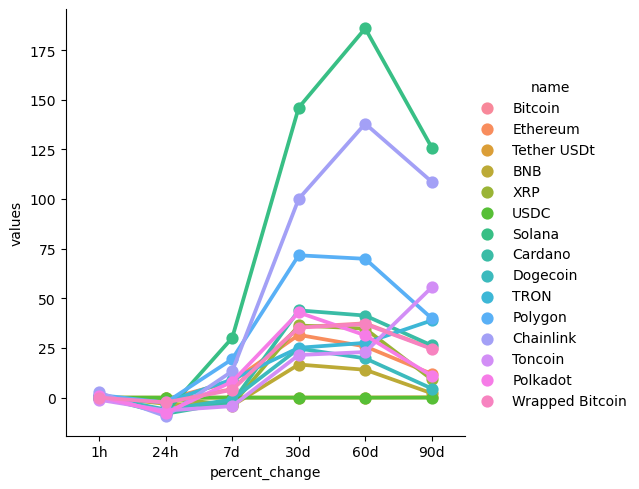

In [43]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

# Bitcoin

In [46]:
df10 = df3[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,36358.70207,2023-11-14 09:00:40.335438
1,Ethereum,2043.74850,2023-11-14 09:00:40.335438
2,Tether USDt,1.00034,2023-11-14 09:00:40.335438
3,BNB,241.50678,2023-11-14 09:00:40.335438
4,XRP,0.66261,2023-11-14 09:00:40.335438
5,USDC,1.00010,2023-11-14 09:00:40.335438
6,Solana,54.27471,2023-11-14 09:00:40.335438
7,Cardano,0.35458,2023-11-14 09:00:40.335438
8,Dogecoin,0.07426,2023-11-14 09:00:40.335438
9,TRON,0.10619,2023-11-14 09:00:40.335438


In [47]:
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,36358.70207,2023-11-14 09:00:40.335438
15,Bitcoin,36358.70207,2023-11-14 09:00:40.335438
30,Bitcoin,36345.12779,2023-11-14 09:01:43.342657
45,Bitcoin,36345.12779,2023-11-14 09:01:43.342657


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

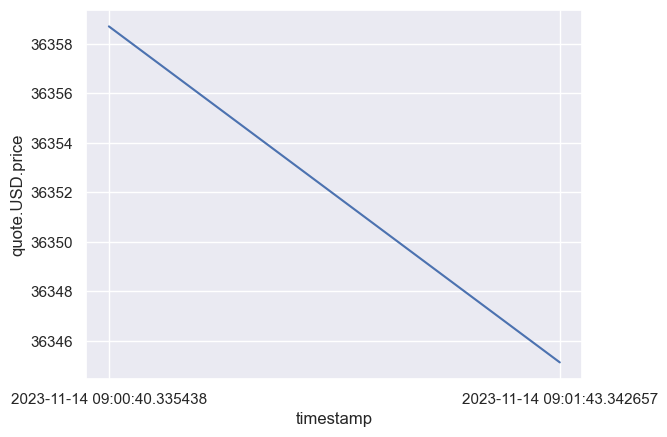

In [49]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)
